In [2]:
import cv2
import pytesseract 
from pdf2image import convert_from_path
import numpy as np
import matplotlib.pyplot as plt
import re

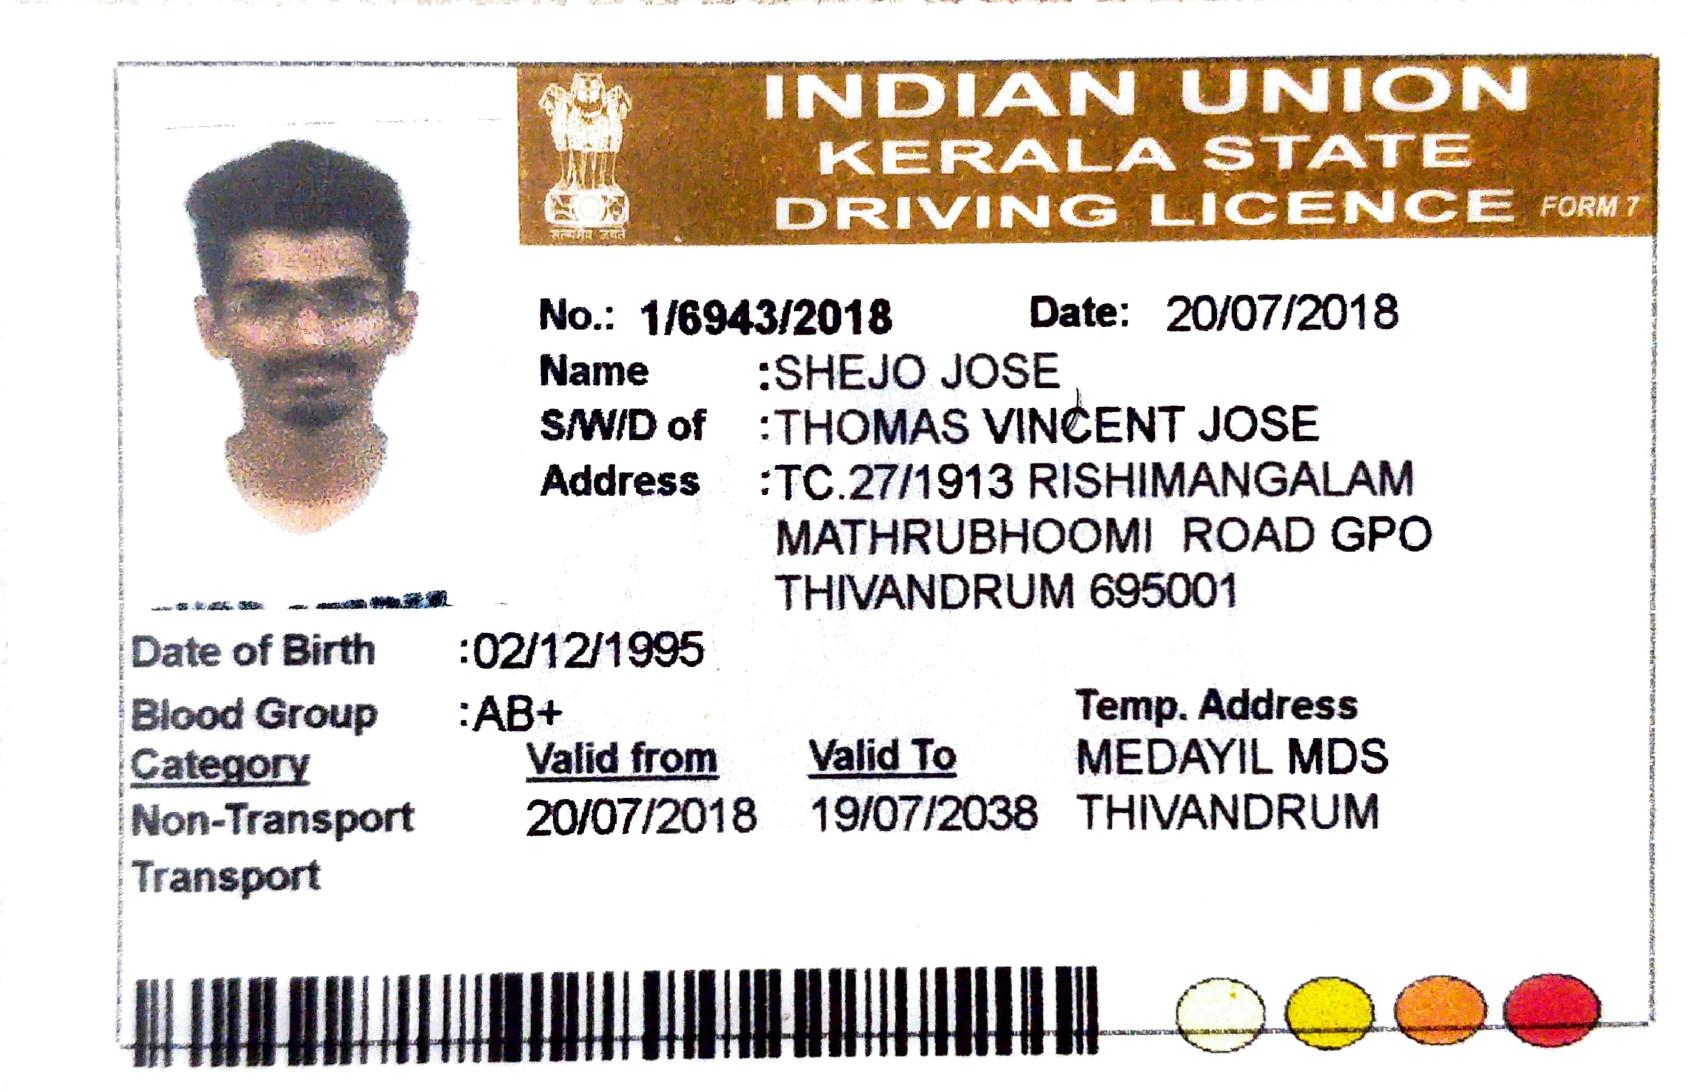

In [3]:
image=convert_from_path("/home/user/Deep_Learning1/Drive_License_Extraction/Driving Licence.pdf",dpi=200,fmt="jpeg")[0]
image

In [4]:
img=np.array(image)


In [5]:
face_data=cv2.CascadeClassifier("haarcascade_frontalface_default.xml")
face=face_data.detectMultiScale(img,minNeighbors=3)
face=list(face[0])
x,y,w,h=face

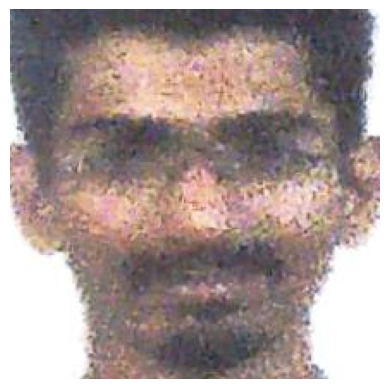

In [6]:
plt.imshow(img[y:y+h,x:x+w])
plt.axis('off')
plt.show()


In [7]:
# Saving Image
photo=img[y:y+h,x:x+w]
Photo=cv2.imwrite("Photo.jpg",cv2.cvtColor(img[y:y+h,x:x+w],cv2.COLOR_RGB2BGR))

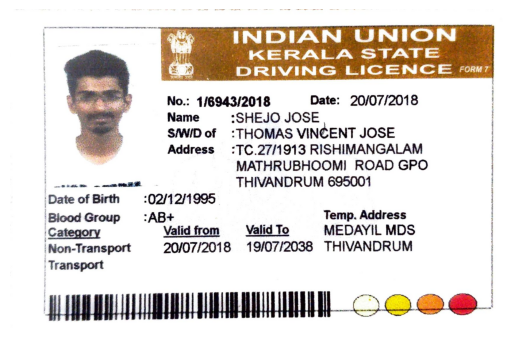

In [8]:
plt.imshow(img)
plt.axis('off')
plt.show()

In [9]:
data=pytesseract.image_to_string(img)
data_lst=[]

dic=pytesseract.image_to_data(img,output_type=pytesseract.Output.DICT)
length=len(dic['text'])
for i in range(length):
    if dic['conf'][i]>20:
        data_lst.append(dic['text'][i])
data_lst
# print(list(data.split()))

['is',
 'KERALA',
 'STATE',
 '@',
 'DRIVING',
 'LICENCE',
 '‘ow:',
 'INDIAN',
 'UNION',
 '    ',
 'No.:',
 '1/6943/2018',
 'Date:',
 '20/07/2018',
 'Name',
 ':SHEJO',
 'JOSE',
 'SMWID',
 'of',
 ':THOMAS',
 'VINCENT',
 'JOSE',
 'Address',
 ':TC.27/1913',
 'RISHIMANGALAM',
 '!',
 'MATHRUBHOOM!',
 'ROAD',
 'GPO',
 '|',
 'THIVANDRUM',
 '695001',
 ' ',
 ' ',
 '‘Date',
 'of',
 'Birth',
 '—',
 ':02/12/1995',
 '‘BloodGroup',
 ':AB+',
 'Temp.',
 'Address',
 '‘Category',
 'Valid',
 'from',
 'Valid',
 'To',
 'MEDAYIL',
 'MDS',
 '20/07/2018',
 '19/07/2038',
 'THIVANDRUM',
 '‘Transport',
 'i',
 '']

In [10]:
# Extraction of Name,Son_of,Address
str_len=len(data_lst)
index=[]
Name=''
Son_of=''
Address=''
for i in range(str_len):
    if (data_lst[i]=="Name") or (data_lst[i]=="SMWID") or (data_lst[i]=="of") or (data_lst[i]=="Address") or (data_lst[i]=="Address") or (data_lst[i]=='695001'):
        index.append(i)
for i in range(index[0]+1,index[1]):
    Name+=data_lst[i]+" "
for i in range(index[2]+1,index[3]):
    Son_of+=data_lst[i]+" "
for i in range(index[3]+1,index[4]+1):
    Address+=data_lst[i]+" "
Name=Name[1:]
Son_of=Son_of[1:]
Address=Address[1:]

print(Name)
print(Son_of)
print(Address)

SHEJO JOSE 
THOMAS VINCENT JOSE 
TC.27/1913 RISHIMANGALAM ! MATHRUBHOOM! ROAD GPO | THIVANDRUM 695001 


In [11]:
# Extraction of Dates
Dates=[]
for i in range(str_len):
    match=re.findall(r"\d{1,2}/\d{2}/\d{4}",data_lst[i])
    if match:
        Dates.append(data_lst[i])
print(Dates)
DOB=Dates[1][1:]
valid_from = Dates[2]
valid_to = Dates[3]
print(DOB)
print(valid_from)
print(valid_to)

['20/07/2018', ':02/12/1995', '20/07/2018', '19/07/2038']
02/12/1995
20/07/2018
19/07/2038


In [12]:
# Extraction of Blood group

for i in range(str_len):
    match = re.search(r"\b(A|B|AB|O)[+-]",data_lst[i])
    if match :
        Blood_group = match.group()

print(Blood_group)

AB+


In [13]:
# Extraction of License No
License_No=""
for i in range(str_len):
    match=re.search(r"\d{1}/\d{4}/\d{4}",data_lst[i])
    if match:
        License_No+=match.group()
License_No

'1/6943/2018'

In [14]:
Driver_License_info={}

Driver_License_info={'License_No':License_No,
                     'Name':Name,
                     'Photo':"Photo.jpg",
                     'S/W/D':Son_of,
                     'Address':Address,
                     'DOB':DOB,
                     'BloodGroup':Blood_group,
                     'valid_from':valid_from,
                     'valid_up_to':valid_to
                     }
Driver_License_info

{'License_No': '1/6943/2018',
 'Name': 'SHEJO JOSE ',
 'Photo': 'Photo.jpg',
 'S/W/D': 'THOMAS VINCENT JOSE ',
 'Address': 'TC.27/1913 RISHIMANGALAM ! MATHRUBHOOM! ROAD GPO | THIVANDRUM 695001 ',
 'DOB': '02/12/1995',
 'BloodGroup': 'AB+',
 'valid_from': '20/07/2018',
 'valid_up_to': '19/07/2038'}

In [15]:
import json
with open("License_info.json","w") as file:
    json.dump(Driver_License_info,file,indent=2)